In [1]:
import cv2
import os
import shutil
import colorsys
import random
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
from glob import glob

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2022-07-27 21:58:15.371118: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [4]:
representations_dir = '/home/christian/Documents/Datasets/OAKGait8/representations/'
training_path = '/home/christian/Documents/Datasets/OAKGait8/training_representations/'
test_path = '/home/christian/Documents/Datasets/OAKGait8/test_representations/'
frs_dir = 'rgb/'
mks_dir = 'masks/'
verbose = False
views = ['060', '075','090','105','120']

In [5]:
def GEI2MGEI(GEI, fr, to):
    GEI[fr:to]==0
    return GEI

In [26]:
def create_dir(folder, force=True, verbose=False):
    '''   Create a directory if it doesn't exist  '''
    try:
        os.makedirs(folder)
        if verbose: print('Directory {} created succesfully.'.format(folder))   
    except:
        if force:
            if verbose: print('{} already exists. Creating a new one'.format(folder))
            shutil.rmtree(folder)
            os.makedirs(folder)
        else:
            if verbose: print('{} already exists.'.format(folder))
            pass

for view in views:
    subjects = sorted(os.listdir(os.path.join(representations_dir, view)))
    for subject in ['001','002','003','004','005','007']:
        create_dir(os.path.join(training_path, subject))
        create_dir(os.path.join(test_path, subject))

In [27]:
training = {'data':[], 'labels': [], 'seqs':['nm-00', 'nm-01', 'nm-02', 'nm-03', 'nm-04', 'cl-00', 'bg-00','cl-01', 'cl-02',
                                             'cl-03', 'cl-04', 'bg-01', 'bg-02', 'bg-03', 'bg-04']}

testing = {'nm':{'data':[], 'labels': [], 'seqs': ['nm-05', 'nm-06']},
            'cl':{'data':[], 'labels': [], 'seqs': ['cl-05','cl-06']},
            'bg':{'data':[], 'labels': [], 'seqs': ['bg-05','bg-06']}}

#training = {'data':[], 'labels': [], 'seqs':['nm-00', 'nm-01', 'nm-02', 'nm-03', 'nm-04', 'cl-00', 'cl-01', 'bg-00','cl-02', 'cl-03','bg-02', 'bg-03', 'bg-01']}
           
h, w = 128, 128
fr = int(h * 0.15)
to = int(h * 0.60)
i = 0 


for view in views:
    rep_dir = os.path.join(representations_dir, view)
    print(f'GENERATING GAIT REPRESENTATIONS FROM VIEW: {view}')
    subjects = sorted(os.listdir(rep_dir))
    skip_sub = ['022', '023']
    
    for subject in subjects:
#     for subject in ['001']:
        if subject not in skip_sub:
            print(f'Processing subject: {subject} view: {view}')
            sub_GEI_dir = os.path.join(rep_dir, subject)
            
            
            
            for seq_tr in training['seqs']:
                walk = seq_tr.split('-')[0]
                for dir in os.listdir(sub_GEI_dir):
                    seq_read = dir.split('.')[0]
                    if seq_read == seq_tr:
                        GEI_name = os.path.join(sub_GEI_dir, f'{seq_tr}.png')
                        print(f'train: {seq_tr}')
                        GEI = GEI2MGEI(cv2.imread(GEI_name, 0),fr, to)
                        GEI_image_name_path = subject+'/'+subject+'_'+view+'_'+dir
                        cv2.imwrite(os.path.join(training_path ,GEI_image_name_path), GEI )

            for walk, dic in testing.items():
                for seq_tr in dic['seqs']:
                    for dir in os.listdir(sub_GEI_dir):
                        seq_read = dir.split('.')[0]
                        if seq_read == seq_tr:
                            GEI_name = os.path.join(sub_GEI_dir, f'{seq_tr}.png')
                            print(f'test: {seq_tr}')
                            GEI = GEI2MGEI(cv2.imread(GEI_name, 0),fr, to)
                            GEI_image_name_path_test = subject+'/'+subject+'_'+view+'_'+dir
                            #print(os.path.join(test_path ,GEI_image_name_path_test))
                            cv2.imwrite(os.path.join(test_path ,GEI_image_name_path_test), GEI )
                    

GENERATING GAIT REPRESENTATIONS FROM VIEW: 060
Processing subject: 000 view: 060
Processing subject: 001 view: 060
train: nm-00
train: nm-01
train: nm-02
train: nm-03
train: nm-04
train: cl-00
train: bg-00
train: cl-01
train: cl-02
train: cl-03
train: bg-01
train: bg-02
train: bg-03
test: nm-05
Processing subject: 002 view: 060
train: nm-00
train: nm-01
train: nm-02
train: nm-03
train: nm-04
train: cl-00
train: bg-00
train: cl-01
train: cl-02
train: cl-03
train: bg-01
train: bg-02
train: bg-03
test: nm-05
Processing subject: 003 view: 060
train: nm-00
train: nm-01
train: nm-02
train: nm-03
train: nm-04
train: cl-00
train: bg-00
train: cl-01
train: cl-02
train: cl-03
train: bg-01
train: bg-02
train: bg-03
test: nm-05
Processing subject: 004 view: 060
train: nm-00
train: nm-01
train: nm-02
train: nm-03
train: nm-04
train: cl-00
train: bg-00
train: cl-01
train: cl-02
train: cl-03
train: bg-01
train: bg-02
train: bg-03
Processing subject: 005 view: 060
train: nm-00
train: nm-01
train: nm-0

In [28]:
train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)

In [29]:
training_data = '/home/christian/Documents/Datasets/OAKGait8/training_representations'
test_data = '/home/christian/Documents/Datasets/OAKGait8/test_representations'

In [31]:
img_height = 160
img_width = 160
batch_size = 8

train_ds = train_datagen.flow_from_directory(
    training_data,
    color_mode='grayscale',
    class_mode = "categorical",
    target_size=(img_height, img_width),
    batch_size=batch_size,
)


test_ds = test_datagen.flow_from_directory(
    test_data,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode = "categorical",
)

Found 390 images belonging to 6 classes.
Found 29 images belonging to 6 classes.


In [32]:
classes = ["001","002","003","004","005","007"]
print(classes)

['001', '002', '003', '004', '005', '007']


In [33]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 5, figsize = (10, 10))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img[:,:,0], cmap='gray')
    ax.axis("off")
  plt.tight_layout()
  plt.show()

(8, 160, 160, 1)


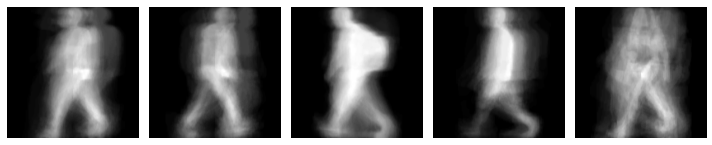

In [34]:
sample_training_images, _= next(iter(train_ds))
print(sample_training_images.shape)
plotImages(sample_training_images[:5])

In [81]:
from tensorflow.keras import regularizers

model_convolutional = tf.keras.models.Sequential([
              tf.keras.layers.Conv2D(256, (3,3)),
              tf.keras.layers.LeakyReLU(alpha=0.1),
              tf.keras.layers.AveragePooling2D((2,2)),
              tf.keras.layers.Conv2D(128, (3,3)),
              tf.keras.layers.LeakyReLU(alpha=0.1),
              tf.keras.layers.AveragePooling2D((2,2)),
              tf.keras.layers.Conv2D(64, (3,3)),
              tf.keras.layers.LeakyReLU(alpha=0.1),
              tf.keras.layers.AveragePooling2D((2,2)),
              tf.keras.layers.Conv2D(32, (3,3)),
              tf.keras.layers.LeakyReLU(alpha=0.1),
              tf.keras.layers.AveragePooling2D((2,2)),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(32),
              tf.keras.layers.LeakyReLU(alpha=0.1),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(16),
              tf.keras.layers.LeakyReLU(alpha=0.1),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(len(classes), activation = "softmax")
])

model_convolutional.build((None, 160, 160, 1))
model_convolutional.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 158, 158, 256)     2560      
_________________________________________________________________
leaky_re_lu_21 (LeakyReLU)   (None, 158, 158, 256)     0         
_________________________________________________________________
average_pooling2d_13 (Averag (None, 79, 79, 256)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 77, 77, 128)       295040    
_________________________________________________________________
leaky_re_lu_22 (LeakyReLU)   (None, 77, 77, 128)       0         
_________________________________________________________________
average_pooling2d_14 (Averag (None, 38, 38, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 36, 36, 64)       

In [82]:
model_convolutional.compile(optimizer="ADAM", loss = "categorical_crossentropy", metrics = ["accuracy"])

history_convolutional = model_convolutional.fit(
    train_ds,
    epochs = 20,
)

Epoch 1/20
49/49 [==============================] - 68s 1s/step - loss: 1.7997 - accuracy: 0.1667
Epoch 2/20
49/49 [==============================] - 68s 1s/step - loss: 1.7923 - accuracy: 0.1846
Epoch 3/20
49/49 [==============================] - 66s 1s/step - loss: 1.7941 - accuracy: 0.1897
Epoch 4/20
49/49 [==============================] - 69s 1s/step - loss: 1.7915 - accuracy: 0.2077
Epoch 5/20
49/49 [==============================] - 71s 1s/step - loss: 1.7330 - accuracy: 0.2385
Epoch 6/20
49/49 [==============================] - 66s 1s/step - loss: 1.5875 - accuracy: 0.3564
Epoch 7/20
49/49 [==============================] - 65s 1s/step - loss: 1.4095 - accuracy: 0.4410
Epoch 8/20
49/49 [==============================] - 66s 1s/step - loss: 1.1393 - accuracy: 0.5667
Epoch 9/20
49/49 [==============================] - 66s 1s/step - loss: 0.8733 - accuracy: 0.6564
Epoch 10/20
49/49 [==============================] - 73s 1s/step - loss: 0.6649 - accuracy: 0.7667
Epoch 11/20
49/49 [

In [83]:
def visualizacion_resultados(history):
  epochs = [i for i in range(20)]
  fig, ax = plt.subplots(1,2)
  train_acc = history.history["accuracy"]
  train_loss = history.history["loss"]
  fig.set_size_inches(16, 9)

  ax[0].plot(epochs, train_acc, "go-", label =" Entrenamiento accuracy")
  ax[0].set_title("Entrenamiento & validación accuracy")
  ax[0].legend()
  ax[0].set_xlabel("Epochs")
  ax[0].set_ylabel("Accuracy")

  ax[1].plot(epochs, train_loss, "go-", label =" Entrenamiento Loss")
  ax[1].set_title("Entrenamiento & validación Loss")
  ax[1].legend()
  ax[1].set_xlabel("Epochs")
  ax[1].set_ylabel("Loss")

  plt.show()

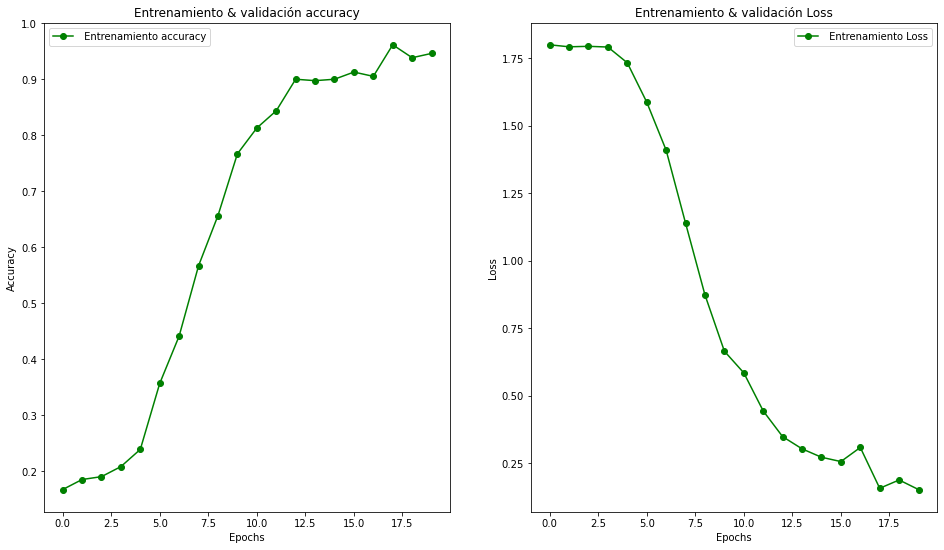

In [84]:
visualizacion_resultados(history_convolutional)

1/1 [==============================] - 1s 539ms/step - loss: 0.0063 - accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         3

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



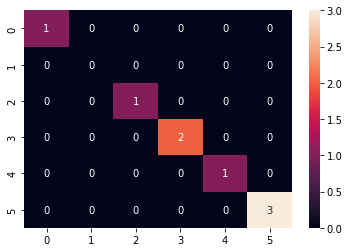

In [85]:
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
import sklearn.metrics as metrics

test_batch = []
for data in next(test_ds):
  test_batch.append(data)

image_batch = test_batch[0]
label_batch = test_batch[1] 

loss, accuracy = model_convolutional.evaluate(image_batch, label_batch)
predictions = tf.argmax(model_convolutional.predict(image_batch), axis=1)
label_batch = tf.argmax(label_batch, axis=1)
cf_matrix = tf.math.confusion_matrix(label_batch, predictions)
sns.heatmap(cf_matrix, annot=True)
f1_score = metrics.classification_report(label_batch, predictions)
print(f1_score)

In [86]:
model_convolutional.save("saved_model/cnn_gait_recognitionV5")

INFO:tensorflow:Assets written to: saved_model/cnn_gait_recognitionV5/assets


In [87]:
cnn_gait_recognition = tf.keras.models.load_model("saved_model/cnn_gait_recognitionV5")
cnn_gait_recognition.build((None, 160, 160, 1))
cnn_gait_recognition.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, None, None, 256)   2560      
_________________________________________________________________
leaky_re_lu_21 (LeakyReLU)   (None, None, None, 256)   0         
_________________________________________________________________
average_pooling2d_13 (Averag (None, None, None, 256)   0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, None, None, 128)   295040    
_________________________________________________________________
leaky_re_lu_22 (LeakyReLU)   (None, None, None, 128)   0         
_________________________________________________________________
average_pooling2d_14 (Averag (None, None, None, 128)   0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, None, None, 64)   

(5, 160, 160, 1)


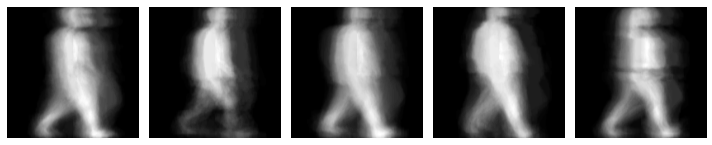

In [88]:
sample_training_images, _= next(iter(test_ds))
print(sample_training_images.shape)
plotImages(sample_training_images[:5])

1/1 [==============================] - 1s 516ms/step - loss: 0.0063 - accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



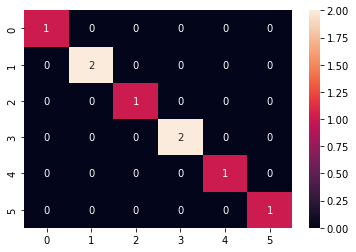

In [89]:
image_batch, label_batch = next(iter(test_ds))

loss, accuracy = cnn_gait_recognition.evaluate(image_batch, label_batch)
predictions = tf.argmax(cnn_gait_recognition.predict(image_batch), axis=1)
label_batch = tf.argmax(label_batch, axis=1)
cf_matrix = tf.math.confusion_matrix(label_batch, predictions)
sns.heatmap(cf_matrix, annot=True)
f1_score = metrics.classification_report(label_batch, predictions)
print(f1_score)

tf.Tensor([0 4 2 5 2 5 1 1], shape=(8,), dtype=int64)
tf.Tensor([0 4 2 5 2 5 1 1], shape=(8,), dtype=int64)


IndexError: index 8 is out of bounds for axis 0 with size 8

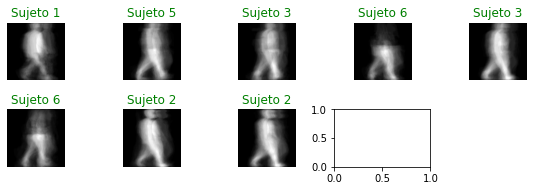

In [90]:
# Print images batch and labels predictions

image_batch, label_batch = (next(iter(test_ds)))

predictions = tf.argmax(cnn_gait_recognition.predict(image_batch), axis=1)
label_batch = tf.argmax(label_batch, axis=1)

print(predictions)
print(label_batch)

plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n], cmap = "gray")
  color = "green" if int(predictions[0]) == int(label_batch[0]) else "red"
  plt.title(f'Sujeto {1+int(predictions[n])}', color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

[[7.3248753e-05 5.2538383e-01 1.3678165e-02 6.4044102e-06 2.2930092e-01
  2.3155744e-01]]
98.07372093200684  ms
Sujeto detectado 002


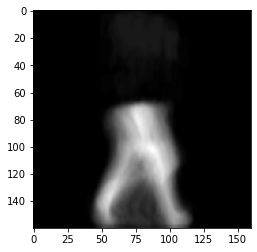

In [101]:
import time
import random

image = cv2.imread('/home/christian/Documents/Datasets/OAKGait8/test_representations_80/007/007_090_nm-05.png', cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image,(160,160))
image = image/255.0
GEI = tf.reshape(image, [1,160,160,1])
start_time = time.time()
preds = cnn_gait_recognition.predict(GEI)
end_time = time.time()
print(preds)
print((end_time-start_time)*1000,' ms')
subject = str(np.argmax(preds)+1)
print("Sujeto detectado 00"+ subject)

plt.imshow(GEI[0], cmap="gray")

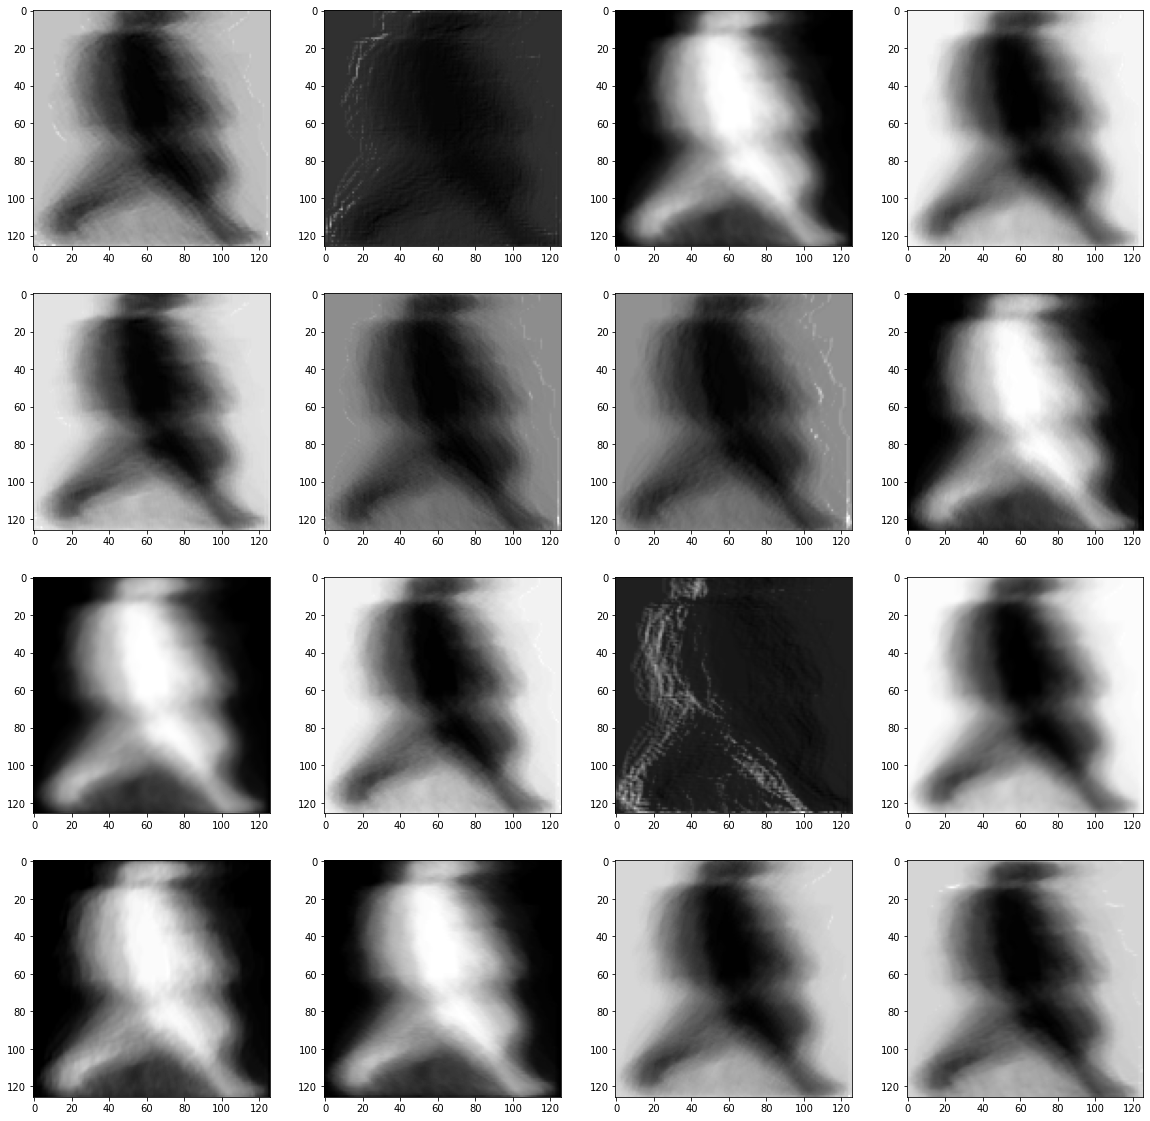

In [54]:
from tensorflow.keras.models import Model

activation_model = Model(inputs=cnn_gait_recognition.inputs, outputs=cnn_gait_recognition.layers[1].output)

image = cv2.imread('/home/christian/Documents/Datasets/OAKGait8/test_representations_80/005/005_090_nm-05.png', cv2.IMREAD_GRAYSCALE)

GEI = tf.reshape(image, [1,128,128,1])



activation = activation_model(GEI)


plt.figure(figsize=(20,20))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(activation[0,:,:,i], cmap="gray")
plt.show()

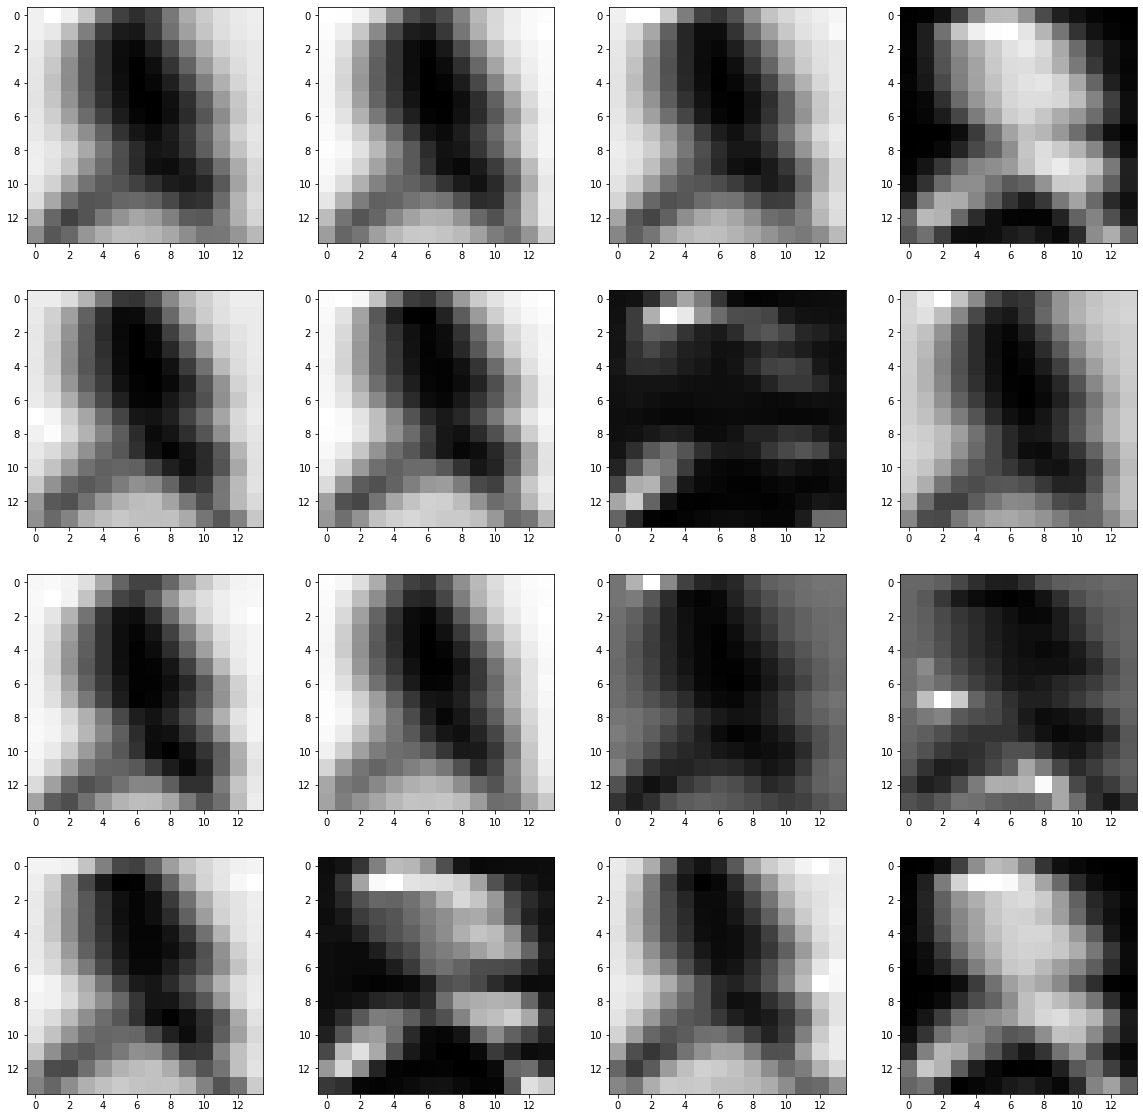

In [56]:
from tensorflow.keras.models import Model

activation_model = Model(inputs=cnn_gait_recognition.inputs, outputs=cnn_gait_recognition.layers[8].output)

image = cv2.imread('/home/christian/Documents/Datasets/OAKGait8/test_representations_80/005/005_090_nm-05.png', cv2.IMREAD_GRAYSCALE)

GEI = tf.reshape(image, [1,128,128,1])



activation = activation_model(GEI)


plt.figure(figsize=(20,20))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(activation[0,:,:,i], cmap="gray")
plt.show()

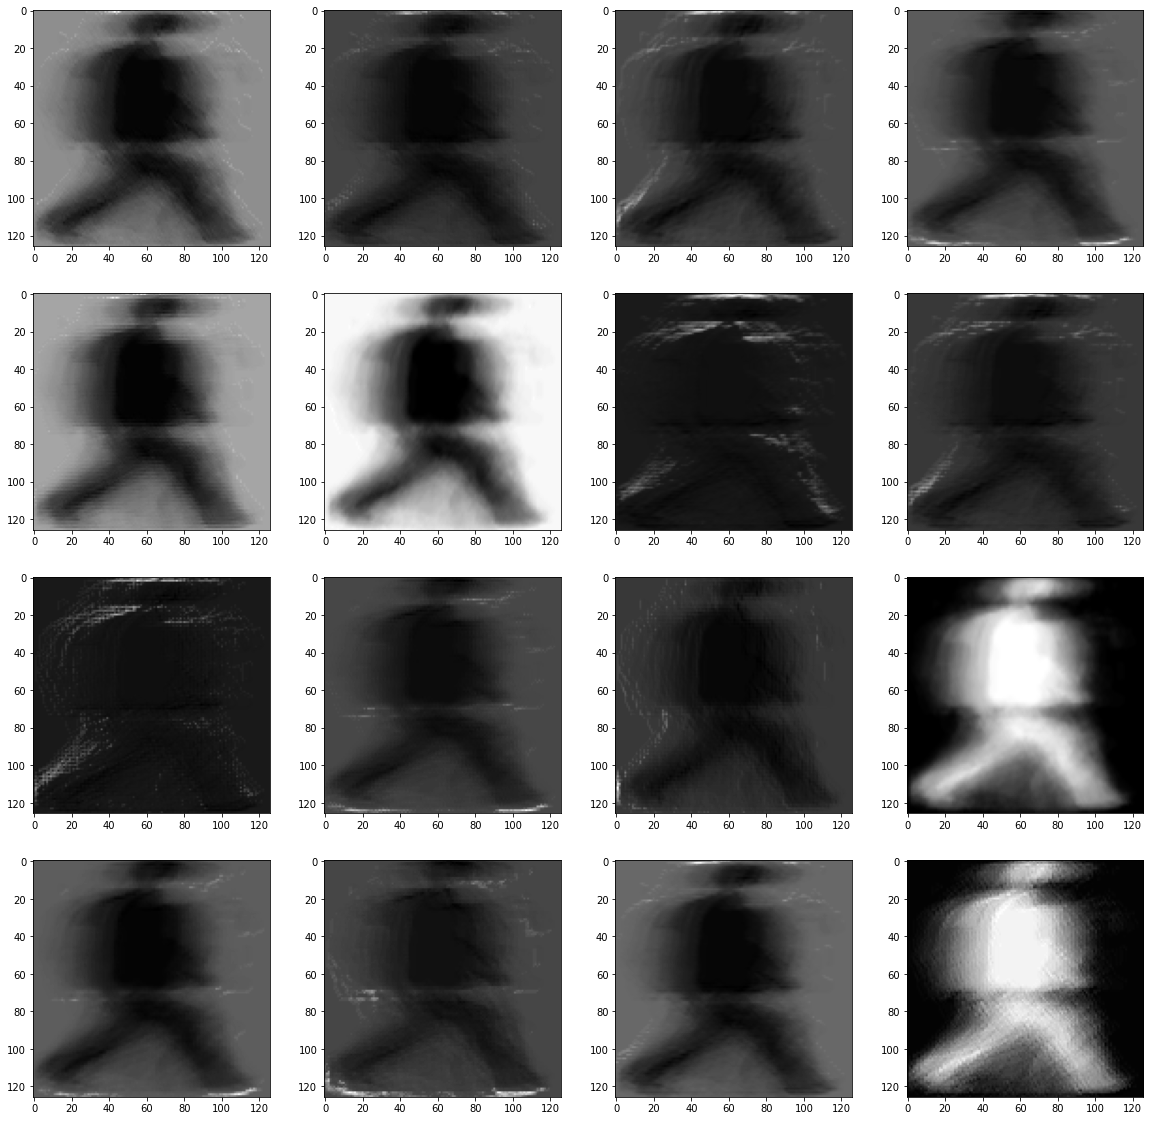

In [18]:
from tensorflow.keras.models import Model

activation_model = Model(inputs=cnn_gait_recognition.inputs, outputs=cnn_gait_recognition.layers[1].output)

image = cv2.imread('/home/christian/Documents/Datasets/OAKGait8/test_representations/003/003_090_nm-05-720.png', cv2.IMREAD_GRAYSCALE)

GEI = tf.reshape(image, [1,128,128,1])



activation = activation_model(GEI)


plt.figure(figsize=(20,20))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(activation[0,:,:,i], cmap="gray")
plt.show()

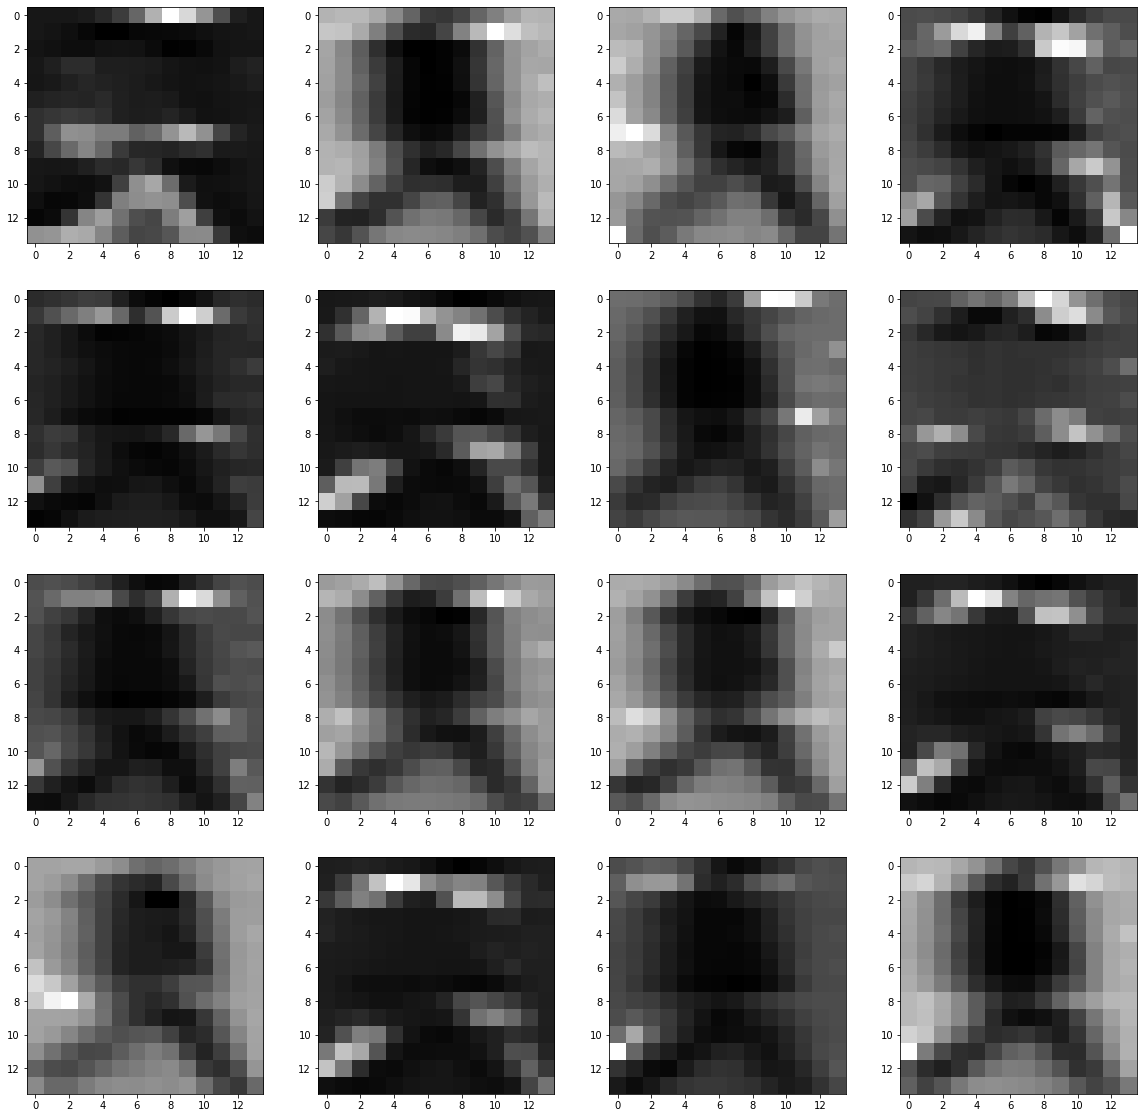

In [17]:
from tensorflow.keras.models import Model

activation_model = Model(inputs=cnn_gait_recognition.inputs, outputs=cnn_gait_recognition.layers[8].output)

image = cv2.imread('/home/christian/Documents/Datasets/OAKGait8/test_representations/003/003_090_nm-05-720.png', cv2.IMREAD_GRAYSCALE)

GEI = tf.reshape(image, [1,128,128,1])



activation = activation_model(GEI)


plt.figure(figsize=(20,20))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(activation[0,:,:,i], cmap="gray")
plt.show()

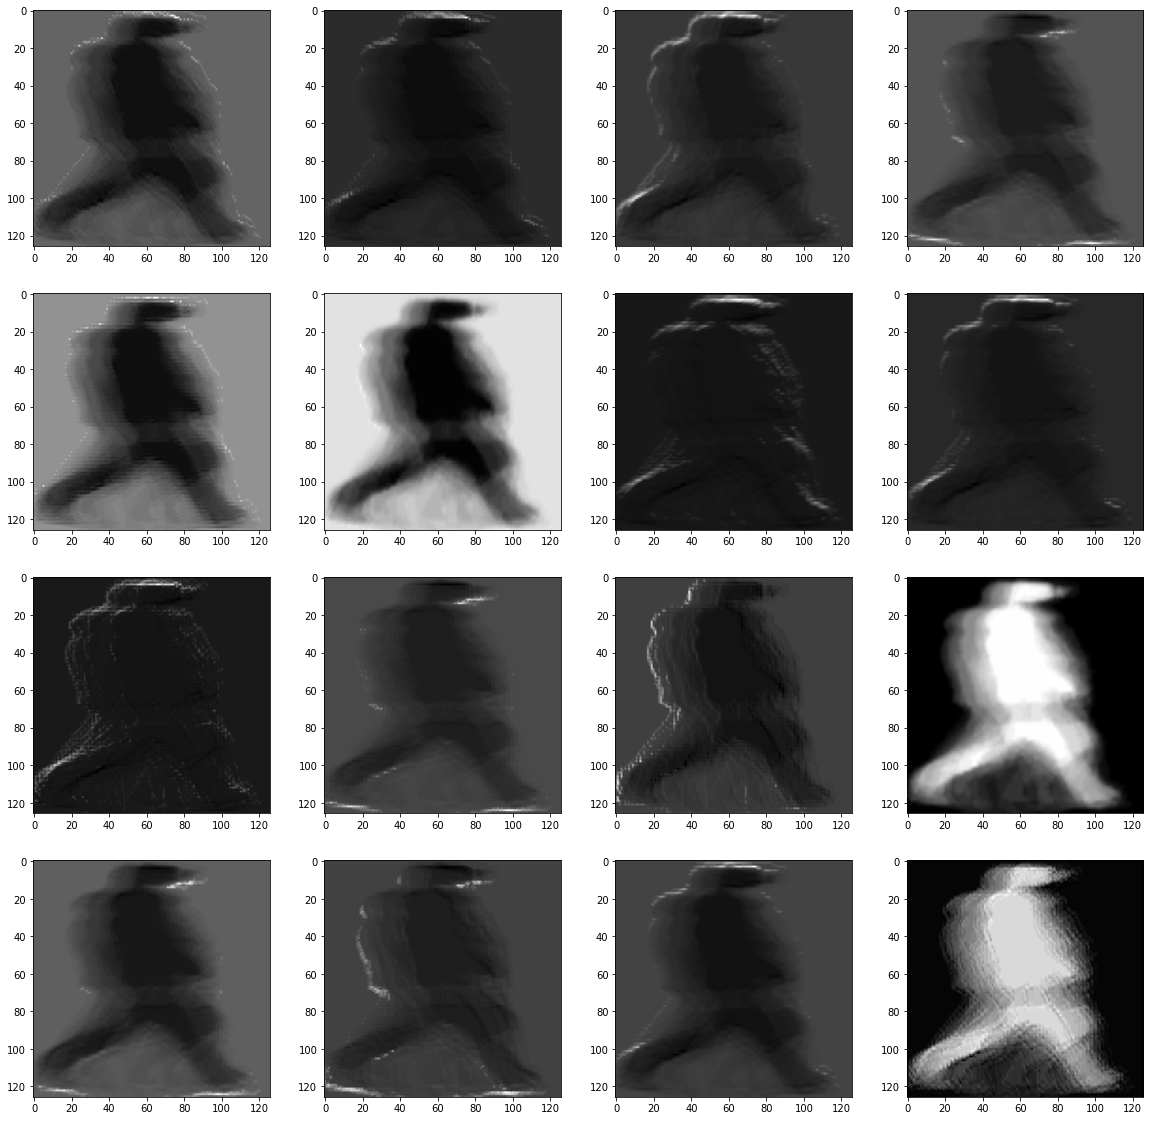

In [21]:
from tensorflow.keras.models import Model

activation_model = Model(inputs=cnn_gait_recognition.inputs, outputs=cnn_gait_recognition.layers[1].output)

image = cv2.imread('/home/christian/Documents/Datasets/OAKGait8/test_representations/005/005_090_nm-05-1135.png', cv2.IMREAD_GRAYSCALE)

GEI = tf.reshape(image, [1,128,128,1])



activation = activation_model(GEI)


plt.figure(figsize=(20,20))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(activation[0,:,:,i], cmap="gray")
plt.show()

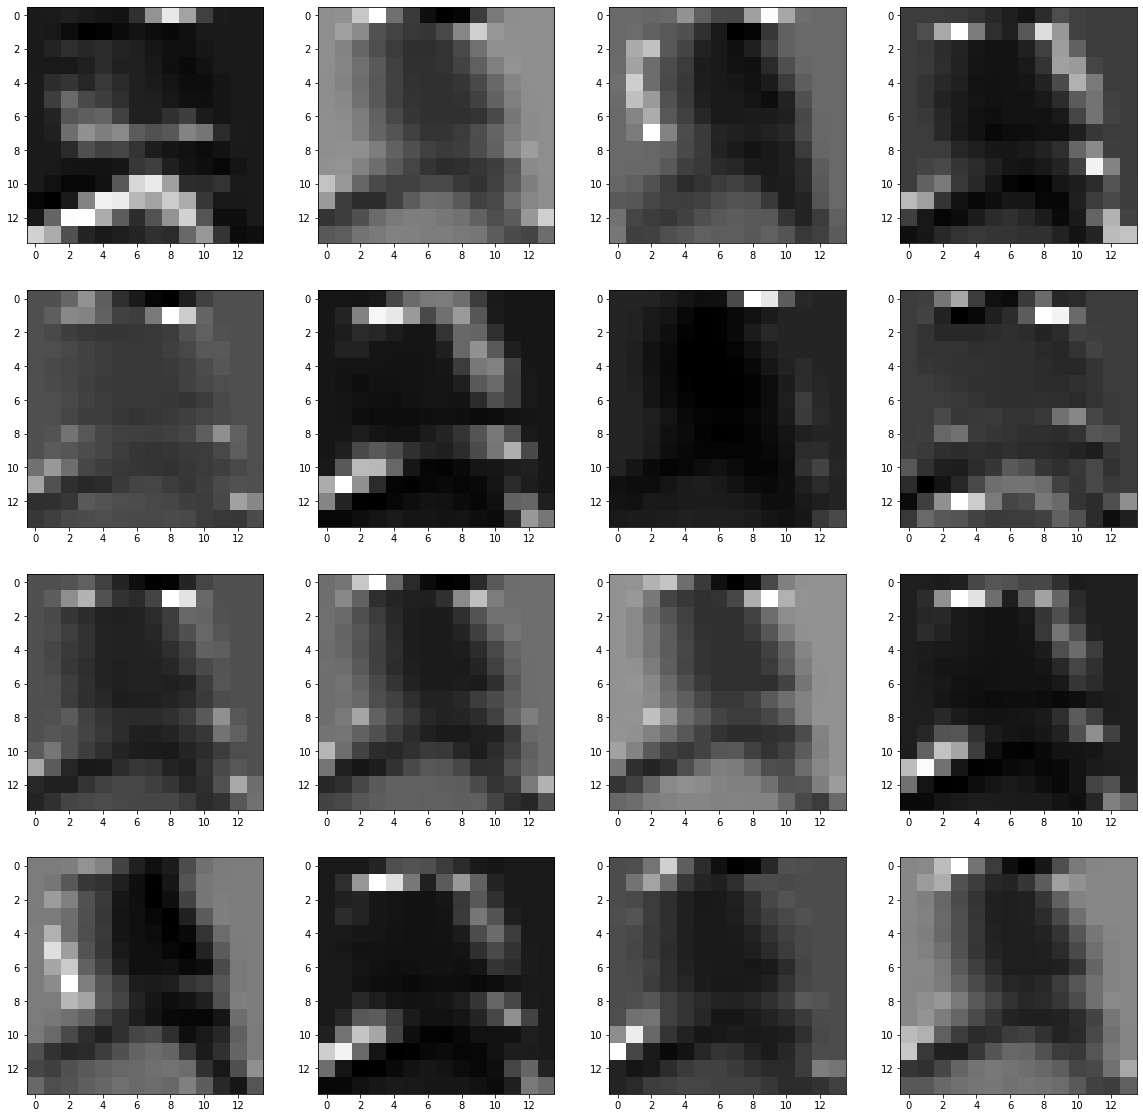

In [22]:
from tensorflow.keras.models import Model

activation_model = Model(inputs=cnn_gait_recognition.inputs, outputs=cnn_gait_recognition.layers[8].output)

image = cv2.imread('/home/christian/Documents/Datasets/OAKGait8/test_representations/005/005_090_nm-05-1135.png', cv2.IMREAD_GRAYSCALE)

GEI = tf.reshape(image, [1,128,128,1])



activation = activation_model(GEI)


plt.figure(figsize=(20,20))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(activation[0,:,:,i], cmap="gray")
plt.show()

In [2]:
im1 = cv2.imread("/home/christian/Documents/Datasets/OAKGait8/representations/090/003/nm-01-985.png",0)
im2 = cv2.imread("/home/christian/Documents/Datasets/OAKGait8/representations/090/003/nm-01-986.png",0)
im3 = cv2.imread("/home/christian/Documents/Datasets/OAKGait8/representations/090/003/nm-01-987.png",0)

images_arr = []

images_arr.append(im1)
images_arr.append(im2)
images_arr.append(im3)

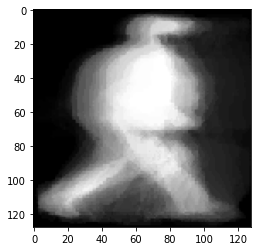

In [3]:
mean_3im = np.mean(images_arr, axis=0)
plt.imshow(mean_3im,cmap='gray')

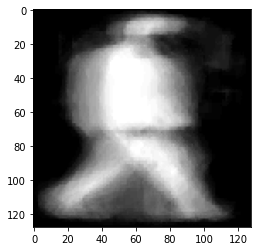

In [5]:
im_60 = cv2.imread("/home/christian/Documents/Datasets/OAKGait8/test_representations_60sil/003/003_075_nm-05-205.png",0)
plt.imshow(im_60, cmap='gray')